In [1]:
#!/usr/bin/env python

# make sure to install these packages before running:
!pip install sodapy

In [2]:
#import the libraries 
import numpy as np
import pandas as pd
from pandas import DataFrame as df, Series as se
#import the library for the API
from sodapy import Socrata

In [3]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.melbourne.vic.gov.au", None)


#getting the pedestrian count data from city of melbourne website from 2009-05-01 to 
#2020-10-31
results = client.get("b2ak-trbp", limit=3391522)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)


In [ ]:
results_df

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,2887628,2019-11-01T17:00:00.000,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,2019-11-01T17:00:00.000,2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,2019-11-01T17:00:00.000,2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,2019-11-01T17:00:00.000,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,2019-11-01T17:00:00.000,2019,November,1,Friday,17,36,Queen St (West),774
...,...,...,...,...,...,...,...,...,...,...
3391517,3391518,2020-10-31T23:00:00.000,2020,October,31,Saturday,23,67,Flinders Ln -Degraves St (South),0
3391518,3391519,2020-10-31T23:00:00.000,2020,October,31,Saturday,23,68,Flinders Ln -Degraves St (North),0
3391519,3391520,2020-10-31T23:00:00.000,2020,October,31,Saturday,23,69,Flinders Ln -Degraves St (Crossing),0
3391520,3391521,2020-10-31T23:00:00.000,2020,October,31,Saturday,23,70,Errol Street (East),0


In [4]:
#Examining the data types of the features of the dataset  
results_df.dtypes

id               object
date_time        object
year             object
month            object
mdate            object
day              object
time             object
sensor_id        object
sensor_name      object
hourly_counts    object
dtype: object

In [5]:
results_df['date'] = results_df['mdate'] + '-' + results_df['month'] + '-' + results_df['year']
results_df.drop(columns=['id',	'date_time','year',	'month',	'mdate',	'day',	'time' ], inplace = True)

In [6]:
#converting 'sensor_id' and 'hourly_counts' features from object datatypes to int
results_df[['sensor_id','hourly_counts']] = results_df[['sensor_id','hourly_counts']].astype('int')
results_df

,sensor_id,sensor_name,hourly_counts,date
0,34,Flinders St-Spark La,300,1-November-2019
1,39,Alfred Place,604,1-November-2019
2,37,Lygon St (East),216,1-November-2019
3,40,Lonsdale St-Spring St (West),627,1-November-2019
4,36,Queen St (West),774,1-November-2019
...,...,...,...,...
3391517,67,Flinders Ln -Degraves St (South),0,31-October-2020
3391518,68,Flinders Ln -Degraves St (North),0,31-October-2020
3391519,69,Flinders Ln -Degraves St (Crossing),0,31-October-2020
3391520,70,Errol Street (East),0,31-October-2020


In [7]:
#Examining the features after data type conversion
results_df.dtypes

sensor_id         int64
sensor_name      object
hourly_counts     int64
date             object
dtype: object

In [8]:
#converting date_time feature from object datatypes to date
results_df['date'] = results_df['date'].astype('datetime64[ns]')
results_df

,sensor_id,sensor_name,hourly_counts,date
0,34,Flinders St-Spark La,300,2019-11-01
1,39,Alfred Place,604,2019-11-01
2,37,Lygon St (East),216,2019-11-01
3,40,Lonsdale St-Spring St (West),627,2019-11-01
4,36,Queen St (West),774,2019-11-01
...,...,...,...,...
3391517,67,Flinders Ln -Degraves St (South),0,2020-10-31
3391518,68,Flinders Ln -Degraves St (North),0,2020-10-31
3391519,69,Flinders Ln -Degraves St (Crossing),0,2020-10-31
3391520,70,Errol Street (East),0,2020-10-31


In [9]:
#Examining the features after data type conversion
results_df.dtypes

sensor_id                 int64
sensor_name              object
hourly_counts             int64
date             datetime64[ns]
dtype: object

In [10]:
#extracting data from 2015 till date
results_df = results_df[results_df['date'] > '2014-12-31']

In [11]:
results_df

,sensor_id,sensor_name,hourly_counts,date
0,34,Flinders St-Spark La,300,2019-11-01
1,39,Alfred Place,604,2019-11-01
2,37,Lygon St (East),216,2019-11-01
3,40,Lonsdale St-Spring St (West),627,2019-11-01
4,36,Queen St (West),774,2019-11-01
...,...,...,...,...
3391517,67,Flinders Ln -Degraves St (South),0,2020-10-31
3391518,68,Flinders Ln -Degraves St (North),0,2020-10-31
3391519,69,Flinders Ln -Degraves St (Crossing),0,2020-10-31
3391520,70,Errol Street (East),0,2020-10-31


In [12]:
#Aggregating hourly pedestrian count for each by sensor-id
new_results_df = pd.DataFrame(results_df.groupby(['date', 'sensor_id'])['hourly_counts'].sum())
new_results_df = new_results_df.reset_index()
new_results_df

,date,sensor_id,hourly_counts
0,2015-01-01,2,21217
1,2015-01-01,3,32695
2,2015-01-01,4,36958
3,2015-01-01,5,31224
4,2015-01-01,6,20457
...,...,...,...
98662,2020-10-31,67,4718
98663,2020-10-31,68,2447
98664,2020-10-31,69,3428
98665,2020-10-31,70,3035


In [13]:
#renaming the hourly_count column
new_results_df = new_results_df.rename(columns={"hourly_counts": "Total_Pedestrian_Count"})
new_results_df

,date,sensor_id,Total_Pedestrian_Count
0,2015-01-01,2,21217
1,2015-01-01,3,32695
2,2015-01-01,4,36958
3,2015-01-01,5,31224
4,2015-01-01,6,20457
...,...,...,...
98662,2020-10-31,67,4718
98663,2020-10-31,68,2447
98664,2020-10-31,69,3428
98665,2020-10-31,70,3035


In [15]:
#Importing the dataset containing status, location and directional information for each pedestrian sensor device installed throughout the city using the API.
results2 = client.get("h57g-5234", limit=2000)
results_df2 = pd.DataFrame.from_records(results2)

In [17]:
#Converting 'sensor_id' and 'hourly_counts' features from object datatypes to int
results_df2['sensor_id'] = results_df2['sensor_id'].astype('int')
results_df2[['latitude','longitude']] = results_df2[['latitude','longitude']].astype('float')

In [ ]:
#Examining the features after data type conversion
results_df2 = pd.DataFrame.from_records(results2)

In [22]:
#Merging the datasets on sensor_id
merged_dataset = new_results_df.set_index('sensor_id').join(results_df2.set_index('sensor_id'))[['date','sensor_description','latitude','longitude','Total_Pedestrian_Count']]

In [23]:
#Validating the dataset
merged_dataset

,date,sensor_description,latitude,longitude,Total_Pedestrian_Count
sensor_id,,,,,
1,2015-02-17,Bourke Street Mall (North),-37.813494,144.965153,23306
1,2015-02-18,Bourke Street Mall (North),-37.813494,144.965153,25683
1,2015-02-19,Bourke Street Mall (North),-37.813494,144.965153,29870
1,2015-02-20,Bourke Street Mall (North),-37.813494,144.965153,33726
1,2015-02-21,Bourke Street Mall (North),-37.813494,144.965153,36076
...,...,...,...,...,...
71,2020-10-27,Westwood Place,-37.812358,144.971370,493
71,2020-10-28,Westwood Place,-37.812358,144.971370,657
71,2020-10-29,Westwood Place,-37.812358,144.971370,387


In [47]:
#Adding the day variable using the date
merged_dataset['day'] = merged_dataset.date.dt.day_name()

[]

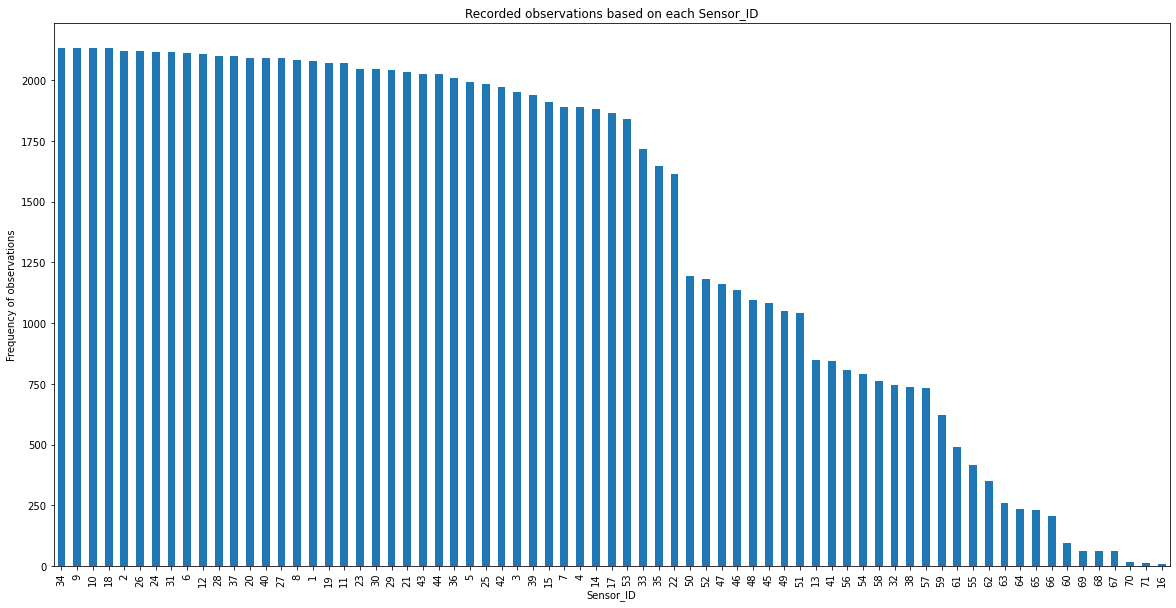

In [73]:
#Visualizing recorded observations based on sensor_ID
z = merged_dataset.index.value_counts().plot(kind = 'bar', figsize = (20,10))
z.set_xlabel("Sensor_ID")
z.set_ylabel("Frequency of observations")
z.set_title("Recorded observations based on each Sensor_ID")

z.plot()